# Data

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMG_SIZE = 224
seed = 42

NUM_CLASSES = 4
BATCH_SIZE = 32
EPOCHS = 20

CLASSES = ["Blight", "Common_Rust", "Gray_Leaf_Spot", "Healthy"]

In [ ]:
from zipfile import ZipFile

data_zip = '/content/drive/My Drive/Corn Disease.zip'

with ZipFile(data_zip, 'r') as zObject:
  data = zObject.extractall()

DATA_PATH = '/content/data/'

In [ ]:
import cv2

main_data = []
training_data = []
test_data = []
validation_data = []


def creating_main_data_array():
  for class_name in CLASSES:
    path = os.path.join(DATA_PATH, class_name)
    print(path)
    class_num = CLASSES.index(class_name)

    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        main_data.append([new_array, class_num])
      except Exception as e:
        print(e)

In [ ]:
creating_main_data_array()
print(len(main_data))

/content/data/Blight
/content/data/Common_Rust
/content/data/Gray_Leaf_Spot
/content/data/Healthy
4188


In [ ]:
import random

random.seed(789)
random.shuffle(main_data)

#%80 Train, %20 Test
split_1 = int(0.8 * len(main_data))
split_2 = int(0.2 * len(main_data))

training_data = main_data[:split_1]
test_data = main_data[split_1:]

split_3 = int(0.1 * len(training_data))
random.shuffle(training_data)
validation_data = training_data[:split_3]
training_data = training_data[split_3:]

print("Training Lenght:", len(training_data))
print("Rest Lenght:", len(test_data))
print("Validataion Lenght:", len(validation_data))

Training Lenght: 3015
Rest Lenght: 838
Validataion Lenght: 335


In [ ]:
X_training_data = []
y_training_data = []


for classes, label in training_data:
  X_training_data.append(classes)
  y_training_data.append(label)

In [ ]:
X_test_data = []
y_test_data = []

for classes, label in test_data:
  X_test_data.append(classes)
  y_test_data.append(label)

In [ ]:
X_validation_data = []
y_validation_data = []

for classes, label in validation_data:
  X_validation_data.append(classes)
  y_validation_data.append(label)

In [ ]:
x_train = np.array(X_training_data)
x_test = np.array(X_test_data)

y_train = np.array(y_training_data)
y_test = np.array(y_test_data)

x_val = np.array(X_validation_data)
y_val = np.array(y_validation_data)

In [ ]:
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("X_validation shape:", x_val.shape)
print("y_validation shape:", y_val.shape)

X_train shape: (3015, 224, 224, 3)
y_train shape: (3015,)
X_test shape: (838, 224, 224, 3)
y_test shape: (838,)
X_validation shape: (335, 224, 224, 3)
y_validation shape: (335,)


In [ ]:
x_train = x_train.astype('float32')
x_train /= 255

x_test = x_test.astype('float32')
x_test /= 255

x_val = x_val.astype('float32')
x_val /= 255

In [ ]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=NUM_CLASSES)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=NUM_CLASSES)

# Değerlendirme Metriklerinin Fonksiyonlaştırılması

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc, balanced_accuracy_score, matthews_corrcoef, recall_score
from sklearn.preprocessing import label_binarize

def get_classification_report(model,x_train, y_train):
  y_test_pred = model.predict(x_test)
  y_test_pred_classes = np.argmax(y_test_pred, axis=1)
  y_test_classes = np.argmax(y_test, axis=1)

  report = classification_report(y_test_classes, y_test_pred_classes, target_names=CLASSES)

  print(f"Classification Report for model:\n {report}")

def get_confisuon_matrix(model, x_train, y_train):
  y_test_pred = model.predict(x_test)
  y_test_pred_classes = y_test_pred.argmax(axis=1)
  y_test_true_classes = y_test.argmax(axis=1)

  cm = confusion_matrix(y_test_true_classes, y_test_pred_classes)
  print(f"Confusion Matrix for model: \n{cm}")

  plt.figure(figsize=(10, 7))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASSES, yticklabels=CLASSES)
  plt.title("Confusion Matrix (Karmaşıklık Matrisi)")
  plt.xlabel("Predicted Labels")
  plt.ylabel("Real (True) Labels")
  plt.show()

def get_MCC(model, x_train, y_train):
  y_test_pred = model.predict(x_test)
  y_test_pred_classes = y_test_pred.argmax(axis=1)
  y_test_classes = y_test.argmax(axis=1)

  mcc = matthews_corrcoef(y_test_classes, y_test_pred_classes)

  print(f"Matthews Correlation Coefficient (MCC) for model: {mcc}")

def get_balanced_acc(model, x_train, y_train):
  y_test_pred = model.predict(x_test)
  y_test_pred_classes = y_test_pred.argmax(axis=1)
  y_test_classes = y_test.argmax(axis=1)

  balanced_acc = balanced_accuracy_score(y_test_classes, y_test_pred_classes)

  print(f"Balanced Accuracy for model: {balanced_acc}")

def get_roc_auc(model, x_train, y_train):
  y_test_classes = np.argmax(y_test, axis=1)
  y_pred_prob = model.predict(x_test)
  y_test_binarized = label_binarize(y_test_classes, classes=[0,1,2,3])
  roc_auc_multi = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr')
  print(f"ROC AUC Score (Multi-class) for model: {roc_auc_multi}")




# DenseNet Transfer Learning

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import models, layers
from tensorflow.keras.layers import  Flatten, Dense

#Görüntülerin giriş boyutları
input_layer = layers.Input(shape=(IMG_SIZE,IMG_SIZE, 3))

model_DenseNet121 = DenseNet121(weights='imagenet',
                              input_tensor=input_layer,
                              include_top=False)

last_layer = model_DenseNet121.output
flatten = layers.Flatten()(last_layer)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)

model_resnet50V2 = models.Model(inputs=input_layer, outputs=output_layer)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in model_DenseNet121.layers[:1]:
  layer.trainable = False

# Freeze the first layer of the ResNet50V2 model to retain pre-trained features
# and prevent its weights from being updated during training.

In [ ]:
model_DenseNet121.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow import keras

callback_list = [
    #Saving the best model based on validation
    keras.callbacks.ModelCheckpoint(
        filepath = 'best_model.keras',
        monitor = 'val_loss',
        save_best_only = True,
        verbose = 1
    ),
    #EarlyStopping stops training if the validation loss
    #does not improve for a specified number of epochs (patience),
    #preventing overfitting and saving time.
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        verbose=1
    )
]

In [ ]:
history_DenseNet121 = model_DenseNet121.fit(x_train, y_train,
                    batch_size = BATCH_SIZE,
                    validation_data = (x_val, y_val),
                    callbacks = callback_list,
                    epochs = EPOCHS
                    )

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 4), output.shape=(None, 7, 7, 1024)

# InceptionV3 Transfer Learning

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import models, layers
from tensorflow.keras.layers import  Flatten, Dense
from tensorflow.keras.optimizers import Adam


BATCH_SIZE = 16
EPOCHS=10

input_layer = layers.Input(shape=(IMG_SIZE,IMG_SIZE, 3))

model_InceptionV3 = InceptionV3(weights='imagenet',
                                      input_tensor=input_layer,
                                      include_top=False
                                      )

last_layer = model_InceptionV3.output
flatten = layers.Flatten()(last_layer)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)

model_InceptionV3 = models.Model(inputs=input_layer, outputs=output_layer)

for layer in model_InceptionV3.layers[:1]:
    layer.trainable = False


model_InceptionV3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow import keras

callback_list = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'best_model.keras',
        monitor = 'val_loss',
        save_best_only = True,
        verbose = 1
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        verbose=1
    )
]

history_InceptionV3 = model_InceptionV3.fit(x_train, y_train,
                    batch_size = BATCH_SIZE,
                    validation_data = (x_val, y_val),
                    callbacks = callback_list,
                    epochs = EPOCHS
                    )

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.7253 - loss: 1.6292
Epoch 1: val_loss improved from inf to 9745.90039, saving model to best_model.keras
189/189 ━━━━━━━━━━━━━━━━━━━━ 156s 416ms/step - accuracy: 0.7255 - loss: 1.6285 - val_accuracy: 0.3254 - val_loss: 9745.9004
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7575 - loss: 1.3751
Epoch 2: val_loss improved from 9745.90039 to 0.39546, saving model to best_model.keras
189/189 ━━━━━━━━━━━━━━━━━━━━ 31s 162ms/step - accuracy: 0.7577 - loss: 1.3729 - val_accuracy: 0.8269 - val_loss: 0.3955
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8405 - loss: 1.0594
Epoch 3: val_loss improved from 0.39546 to 0.38065, saving model to best_model.keras
189/189 ━━━━━━━━━━━━━━━━━━━━ 43s 173ms/step - accuracy: 0.8406 - loss: 1.0574 - val_accuracy: 0.8448 - val_loss: 0.3807
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy

In [ ]:
get_classification_report(model_InceptionV3,x_train,y_train)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step
Classification Report for model:                 precision    recall  f1-score   support

        Blight       0.76      0.93      0.84       222
   Common_Rust       1.00      0.87      0.93       267
Gray_Leaf_Spot       0.80      0.69      0.74       115
       Healthy       0.99      1.00      1.00       234

      accuracy                           0.90       838
     macro avg       0.89      0.87      0.88       838
  weighted avg       0.91      0.90      0.90       838



27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
Confusion Matrix for model: [[207   0  15   0]
 [ 29 232   5   1]
 [ 35   0  79   1]
 [  0   0   0 234]]


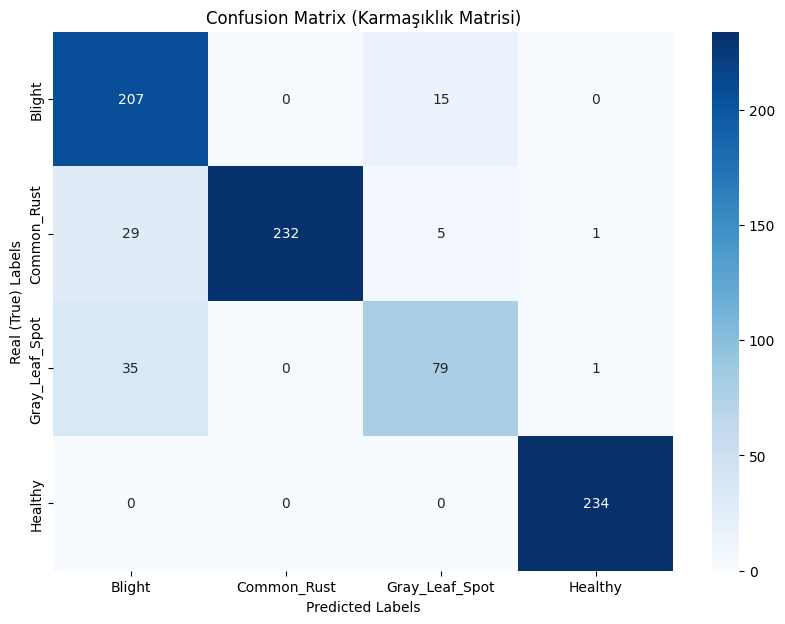

In [ ]:
get_confisuon_matrix(model_InceptionV3,x_train,y_train)

In [ ]:
get_balanced_acc(model_InceptionV3,x_train,y_train)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step
Balanced Accuracy for model: 0.8720757029623664


In [ ]:
get_MCC(model_InceptionV3,x_train,y_train)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step
Matthews Correlation Coefficient (MCC) for model: 0.8629335704074362


In [ ]:
get_roc_auc(model_InceptionV3,x_train,y_train)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step
ROC AUC Score (Multi-class) for model: 0.9848869126274303


# VGG16 Transfer Learning

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
from tensorflow.keras.layers import  Flatten, Dense

BATCH_SIZE = 32
EPOCHS=20

input_layer = layers.Input(shape=(IMG_SIZE,IMG_SIZE, 3))

model_VGG16 = VGG16(weights='imagenet',
                                      input_tensor=input_layer,
                                      include_top=False
                                      )

last_layer = model_VGG16.output
flatten = layers.Flatten()(last_layer)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)

model_VGG16 = models.Model(inputs=input_layer, outputs=output_layer)

for layer in model_VGG16.layers[:1]:
    layer.trainable = False


model_VGG16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow import keras

callback_list = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'best_model.keras',
        monitor = 'val_loss',
        save_best_only = True,
        verbose = 1
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        verbose=1
    )
]

history_VGG16 = model_VGG16.fit(x_train, y_train,
                    batch_size = BATCH_SIZE,
                    validation_data = (x_val, y_val),
                    callbacks = callback_list,
                    epochs = EPOCHS
                    )

Epoch 1/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.2925 - loss: 1.8488
Epoch 1: val_loss improved from inf to 1.31684, saving model to best_model.keras
95/95 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.2924 - loss: 1.8454 - val_accuracy: 0.3104 - val_loss: 1.3168
Epoch 2/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.5069 - loss: 1.0379
Epoch 2: val_loss improved from 1.31684 to 0.64795, saving model to best_model.keras
95/95 ━━━━━━━━━━━━━━━━━━━━ 48s 493ms/step - accuracy: 0.5079 - loss: 1.0366 - val_accuracy: 0.7612 - val_loss: 0.6479
Epoch 3/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.6998 - loss: 0.8292
Epoch 3: val_loss improved from 0.64795 to 0.60650, saving model to best_model.keras
95/95 ━━━━━━━━━━━━━━━━━━━━ 88s 553ms/step - accuracy: 0.6995 - loss: 0.8291 - val_accuracy: 0.7731 - val_loss: 0.6065
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.7918 - loss: 0.5327
Epoch 4: val_loss improved from 0.60650 to 0.56773, s

#######################################################
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step
Classification Report for model:
                 precision    recall  f1-score   support

        Blight       0.88      0.86      0.87       222
   Common_Rust       0.99      0.92      0.95       267
Gray_Leaf_Spot       0.75      0.85      0.80       115
       Healthy       0.96      1.00      0.98       234

      accuracy                           0.92       838
     macro avg       0.90      0.91      0.90       838
  weighted avg       0.92      0.92      0.92       838

#######################################################
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step
Confusion Matrix for model: 
[[192   2  27   1]
 [ 11 245   5   6]
 [ 14   1  98   2]
 [  0   0   0 234]]


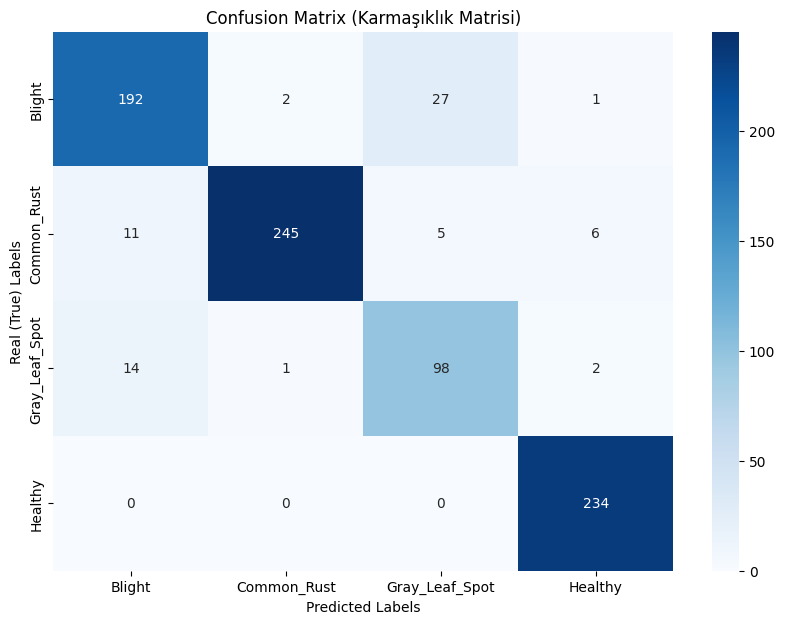

#######################################################
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step
Balanced Accuracy for model: 0.9086604435407561
#######################################################
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step
Matthews Correlation Coefficient (MCC) for model: 0.8885534631958321
#######################################################
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step
ROC AUC Score (Multi-class) for model: 0.9889778928904362


In [ ]:
print("#######################################################")
get_classification_report(model_VGG16,x_train,y_train)
print("#######################################################")
get_confisuon_matrix(model_VGG16,x_train,y_train)
print("#######################################################")
get_balanced_acc(model_VGG16,x_train,y_train)
print("#######################################################")
get_MCC(model_VGG16,x_train,y_train)
print("#######################################################")
get_roc_auc(model_VGG16,x_train,y_train)

# VGG19 Transfer Learning

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras import models, layers
from tensorflow.keras.layers import  Flatten, Dense

BATCH_SIZE = 32
EPOCHS=20

input_layer = layers.Input(shape=(IMG_SIZE,IMG_SIZE, 3))

model_VGG19 = VGG19(weights='imagenet',
                                      input_tensor=input_layer,
                                      include_top=False
                                      )

last_layer = model_VGG19.output
flatten = layers.Flatten()(last_layer)
output_layer = layers.Dense(NUM_CLASSES, activation='softmax')(flatten)

model_VGG19 = models.Model(inputs=input_layer, outputs=output_layer)

for layer in model_VGG19.layers[:1]:
    layer.trainable = False


model_VGG19.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow import keras

callback_list = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'best_model.keras',
        monitor = 'val_loss',
        save_best_only = True,
        verbose = 1
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        verbose=1
    )
]

history_VGG19 = model_VGG19.fit(x_train, y_train,
                    batch_size = BATCH_SIZE,
                    validation_data = (x_val, y_val),
                    callbacks = callback_list,
                    epochs = EPOCHS
                    )

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.2838 - loss: 10.9166
Epoch 1: val_loss improved from inf to 1.34900, saving model to best_model.keras
95/95 ━━━━━━━━━━━━━━━━━━━━ 70s 661ms/step - accuracy: 0.2838 - loss: 10.8415 - val_accuracy: 0.3343 - val_loss: 1.3490
Epoch 2/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 0.3107 - loss: 1.3542
Epoch 2: val_loss did not improve from 1.34900
95/95 ━━━━━━━━━━━━━━━━━━━━ 71s 575ms/step - accuracy: 0.3107 - loss: 1.3542 - val_accuracy: 0.2239 - val_loss: 1.3529
Epoch 3/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.3021 - loss: 1.3506
Epoch 3: val_loss improved from 1.34900 to 1.33856, saving model to best_model.keras
95/95 ━━━━━━━━━━━━━━━━━━━━ 84s 596ms/step - accuracy: 0.3020 - loss: 1.3506 - val_accuracy: 0.3343 - val_loss: 1.3386
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.2960 - loss: 1.3505
Epoch 4: val_loss did not improve fr

#######################################################
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step
Classification Report for model:
                 precision    recall  f1-score   support

        Blight       0.00      0.00      0.00       222
   Common_Rust       0.32      1.00      0.48       267
Gray_Leaf_Spot       0.00      0.00      0.00       115
       Healthy       0.00      0.00      0.00       234

      accuracy                           0.32       838
     macro avg       0.08      0.25      0.12       838
  weighted avg       0.10      0.32      0.15       838

#######################################################


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step
Confusion Matrix for model: 
[[  0 222   0   0]
 [  0 267   0   0]
 [  0 115   0   0]
 [  0 234   0   0]]


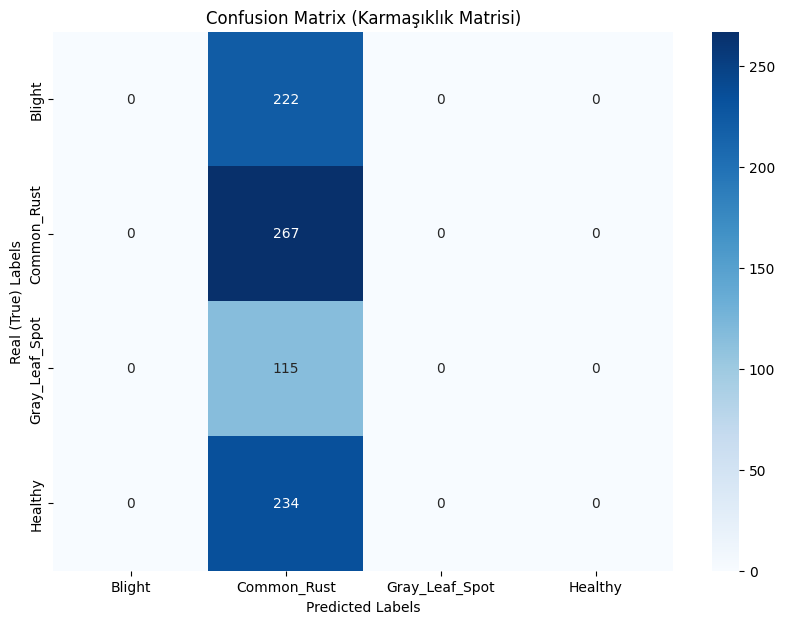

#######################################################
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step
Balanced Accuracy for model: 0.25
#######################################################
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step
Matthews Correlation Coefficient (MCC) for model: 0.0
#######################################################
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step
ROC AUC Score (Multi-class) for model: 0.5


In [ ]:
print("#######################################################")
get_classification_report(model_VGG19,x_train,y_train)
print("#######################################################")
get_confisuon_matrix(model_VGG19,x_train,y_train)
print("#######################################################")
get_balanced_acc(model_VGG19,x_train,y_train)
print("#######################################################")
get_MCC(model_VGG19,x_train,y_train)
print("#######################################################")
get_roc_auc(model_VGG19,x_train,y_train)